In [2]:
import matplotlib.pyplot as plt
import os

import torch
import numpy as np
import albumentations
from PIL import Image

In [3]:
from glob import glob
import random

def plot_augs(folder, tfms, rows, cols, width, height, basewidth=224):
    '''
        Picks a random image from the given folder
        and applies a given albumentations transform
    '''
    folder = glob(os.path.join(folder, '*'))
    img = random.choice(folder)
    
    img = Image.open(img)
    img = np.array(img)

    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(width,height))

    for i, ax in enumerate(fig.axes):
        ax.axis("off")
        if i == 0:
            # Original Image
            ax.set_title('Original image')
            ax.imshow(img)
        else:
            aug = tfms(image=img)
            image = aug['image']
            ax.set_title(f'Aug {i}')
            ax.imshow(image)

In [4]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

tfms = albumentations.Compose(
        [
            albumentations.Resize(224, 224),
            albumentations.Cutout(num_holes=5, max_h_size=30, max_w_size=30, fill_value=255, always_apply=False, p=0.5),
        ]
)

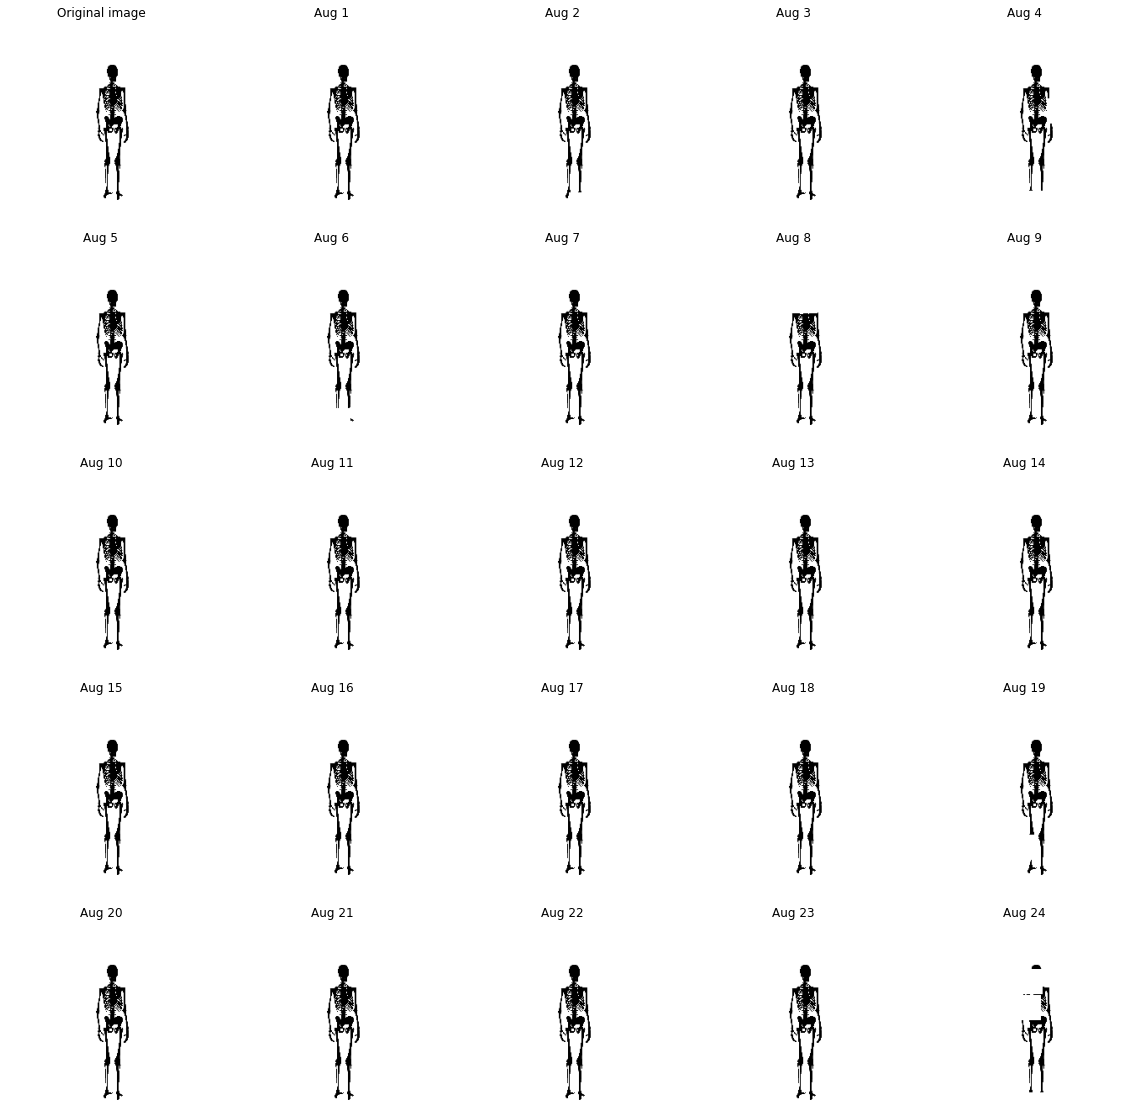

In [5]:
plot_augs('../data/training_masked', tfms, 5, 5, 20, 20)